In [1]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

In [2]:
cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.MHEALTH)
dataset = HARDataset(cfg, parse, override_cache=False)

Creating config hash...
Loading config hash...


Loading windows: 100%|██████████| 2568/2568 [00:01<00:00, 1651.47it/s]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
2     266
3     266
4     265
1     264
9     259
5     255
10    253
7     251
8     248
6     241
Name: count, dtype: int64
activity_id
2     230
3     230
4     230
5     230
9     230
10    230
11    230
1     224
7     224
8     223
6     215
12     72
Name: count, dtype: int64
train: 1557 | val: 499 | test: 512


In [4]:
weights = dataset.get_class_weights(train_loader)
len(weights)

12

In [5]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[0]

,chest_acc_x,chest_acc_y,chest_acc_z,ecg_1,ecg_2,lankle_acc_x,lankle_acc_y,lankle_acc_z,lankle_gyro_x,lankle_gyro_y,...,lankle_mag_z,rarm_acc_x,rarm_acc_y,rarm_acc_z,rarm_gyro_x,rarm_gyro_y,rarm_gyro_z,rarm_mag_x,rarm_mag_y,rarm_mag_z
0,-8.6360,-1.02900,-3.7137,0.226060,0.19676,1.19890,-9.4540,-2.825300,0.58627,-0.58349,...,-3.084400,-0.29813,-11.2500,4.0208,0.33725,-0.82957,0.14440,-5.31140,-10.4940,-20.2180
1,-8.3480,-0.78373,-3.7126,2.838300,1.74570,1.02440,-9.7751,-3.249300,0.59740,-0.57786,...,-3.762500,0.62480,-9.9551,3.4918,0.37647,-0.83984,0.12500,0.13844,-4.1092,-11.5080
2,-8.5316,-0.69421,-3.7572,0.012559,0.24280,1.41700,-10.0200,-3.018100,0.59740,-0.57786,...,-5.143200,0.69421,-9.1708,2.9165,0.37647,-0.83984,0.12500,5.95640,3.1756,-3.1617
3,-8.5823,-0.68410,-3.8089,-0.933540,-0.48561,1.29870,-10.1760,-2.756200,0.59740,-0.57786,...,-6.638000,0.88663,-8.7829,2.7067,0.37647,-0.83984,0.12500,10.87300,10.0850,3.0047
4,-9.0487,-1.09820,-3.2673,-0.175820,-0.11722,0.79437,-10.3400,-2.332000,0.59926,-0.58912,...,-8.406100,1.03170,-8.7049,2.5127,0.37647,-0.86448,0.18534,14.88800,16.6040,5.5469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-8.9027,-1.33070,-2.0987,-0.217690,-0.12140,1.85390,-9.9612,-0.083690,0.66605,-0.56098,...,-2.653700,-0.56864,-8.0802,2.9814,0.53922,-0.81520,0.40948,-1.29010,14.6180,-9.5583
124,-8.8686,-1.01320,-1.4912,-0.213500,-0.12559,1.85120,-9.7840,-0.179020,0.66419,-0.56285,...,-2.326700,-0.61901,-8.1299,3.0102,0.53922,-0.81520,0.40948,-1.96290,19.1540,-10.3390
125,-8.4859,-0.95584,-1.7913,-0.205130,-0.10466,2.25920,-9.6341,-0.042446,0.66419,-0.56285,...,-1.027400,-0.86881,-8.1466,3.3427,0.53922,-0.81520,0.40948,-3.00920,22.2380,-11.4740
126,-8.2976,-1.27970,-1.5362,-0.184200,-0.07954,2.54740,-9.5716,0.265640,0.66419,-0.56285,...,-0.024312,-1.20470,-7.9054,3.4589,0.53725,-0.81109,0.41810,-4.62330,22.4140,-13.6740


torch.Size([32, 128, 23])


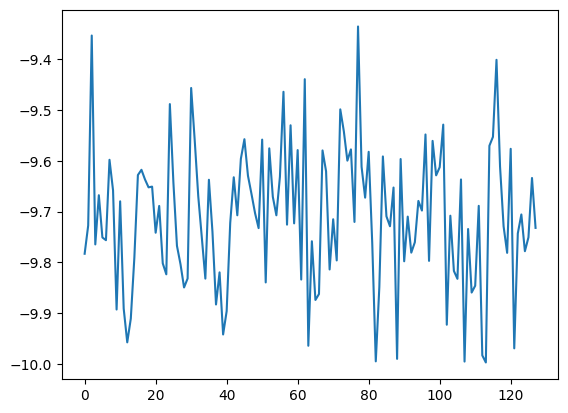

In [13]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()